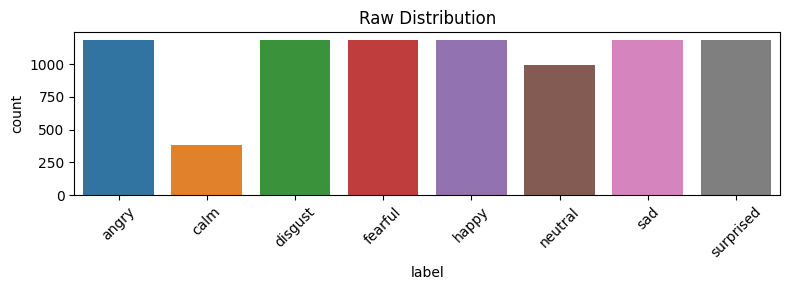

X: (8480, 100, 40)
After ROS: [947 947 947 947 947 947 947 947]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 98, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,624 (873.53 KB)

 Trainable params: 222,984 (871.03 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.4551 - loss: 0.1440 - val_accuracy: 0.5265 - val_loss: 0.1087 - learning_rate: 0.0010
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.6992 - loss: 0.0703 - val_accuracy: 0.6881 - val_loss: 0.0651 - learning_rate: 0.0010
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.7321 - loss: 0.0611 - val_accuracy: 0.7300 - val_loss: 0.0578 - learning_rate: 0.0010
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.7501 - loss: 0.0568 - val_accuracy: 0.7347 - val_loss: 0.0536 - learning_rate: 0.0010
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.7530 - loss: 0.0537 - val_accuracy: 0.7488 - val_loss: 0.0518 - learning_rate: 0.0010
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.7614 - loss: 0.0530 - val_accuracy: 0.7488 - val_loss: 0.0531 - learning_rate: 0.0010
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.7

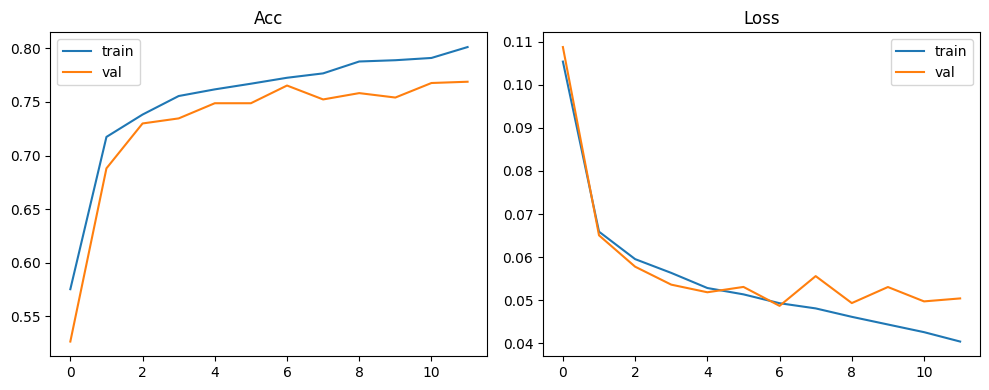

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.88      0.87      0.87       237
        calm       0.25      0.88      0.39        76
     disgust       0.87      0.76      0.81       237
     fearful       0.68      0.85      0.76       237
       happy       0.83      0.75      0.78       237
     neutral       1.00      0.82      0.90       198
         sad       0.99      0.64      0.77       237
   surprised       0.97      0.65      0.77       237

    accuracy                           0.77      1696
   macro avg       0.81      0.78      0.76      1696
weighted avg       0.86      0.77      0.79      1696



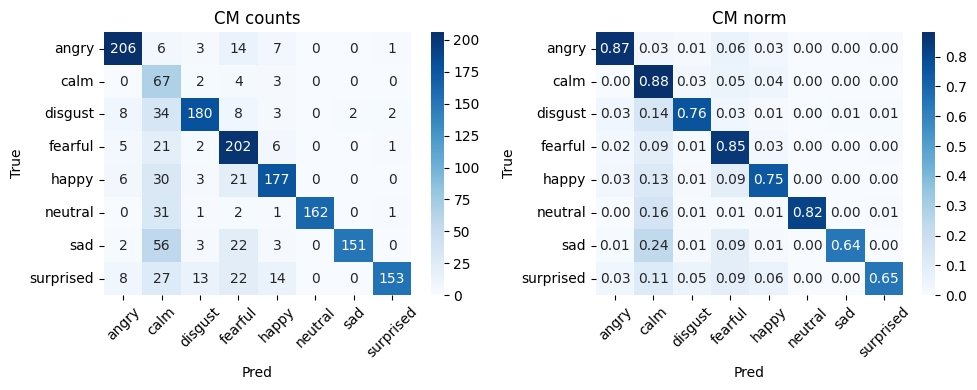

In [12]:
# single cell: MFCC → Conv1D → BiLSTM → focal loss w/class α → confusion matrix

import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D,
    Bidirectional, LSTM,
    BatchNormalization, Dropout, Dense
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ─── reproducibility & warnings ───────────────────────────────────────────────
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)

# ─── 1) load file‑paths + labels ────────────────────────────────────────────────
paths, labels = [], []
emotion_map = {
  '01':'neutral','02':'calm','03':'happy','04':'sad',
  '05':'angry','06':'fearful','07':'disgust','08':'surprised'
}

for root,_,files in os.walk('/kaggle/input'):
    for fn in files:
        if fn.lower().endswith('.wav'):
            fp = os.path.join(root, fn)
            paths.append(fp)
            if fn[0].isdigit() and '-' in fn:
                code = fn.split('-')[2]
                labels.append(emotion_map.get(code,code).lower())
            else:
                labels.append(fn.split('_')[-1].split('.')[0].lower())

df = pd.DataFrame({'speech':paths,'label':labels})

# ─── 2) harmonize + plot ───────────────────────────────────────────────────────
label_map = {
  'fear':'fearful','fearful':'fearful',
  'ps':'surprised','pleasantsurprise':'surprised','surprised':'surprised',
  'neutral':'neutral','calm':'calm','sad':'sad',
  'happy':'happy','angry':'angry','disgust':'disgust'
}
df['label'] = df['label'].map(label_map).fillna(df['label'])

plt.figure(figsize=(8,3))
sns.countplot(x='label',data=df,order=sorted(df['label'].unique()))
plt.title("Raw Distribution"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# ─── 3) MFCC + light augmentation ─────────────────────────────────────────────
def extract_mfcc(fp,n_mfcc=40,max_len=100,aug=0.3):
    y,sr = librosa.load(fp,sr=None)
    if np.random.rand() < aug:
        if np.random.rand()<0.5:
            y = librosa.effects.pitch_shift(y=y,sr=sr,n_steps=np.random.uniform(-2,2))
        else:
            y = librosa.effects.time_stretch(y=y,rate=np.random.uniform(0.8,1.2))
    m = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=n_mfcc)
    if m.shape[1]<max_len:
        m = np.pad(m,((0,0),(0,max_len-m.shape[1])),mode='constant')
    else:
        m = m[:,:max_len]
    m = (m-m.mean())/(m.std()+1e-6)
    return m.T

n_mfcc,max_len = 40,100
X = np.stack([extract_mfcc(fp,n_mfcc,max_len) for fp in df['speech']])
print("X:",X.shape)  # (N,100,40)

# ─── 4) encode + stratified split ──────────────────────────────────────────────
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(df[['label']])
lbls = np.argmax(y,axis=1)

X_tr,X_va,y_tr,y_va,lab_tr,lab_va = train_test_split(
    X,y,lbls,test_size=0.2,random_state=42,stratify=lbls
)

# ─── 5) oversample minority classes = Balanced Train ──────────────────────────
t,f = X_tr.shape[1],X_tr.shape[2]
ros = RandomOverSampler(random_state=42)
Xf = X_tr.reshape(len(X_tr),t*f)
Xr,lr = ros.fit_resample(Xf,lab_tr)
X_tr = Xr.reshape(-1,t,f)
y_tr = to_categorical(lr,num_classes=y.shape[1])
print("After ROS:",np.bincount(lr))

# ─── 6) build per‑class α from original train dist ─────────────────────────────
orig_counts = np.bincount(lab_tr)
inv_freq = 1.0/orig_counts
alpha_vec = inv_freq/np.sum(inv_freq)  # sum to 1

# ─── 7) focal loss w/ vector α ─────────────────────────────────────────────────
def focal_loss(alpha, gamma=2.0):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred,1e-6,1-1e-6)
        ce = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_mean(tf.reduce_sum(weight * ce, axis=1))
    return loss_fn

# ─── 8) model: Conv1D → BiLSTM → Dense ─────────────────────────────────────────
model = Sequential([
    Conv1D(64,3,activation='relu',input_shape=(t,f)),
    BatchNormalization(), MaxPooling1D(2), Dropout(0.3),
    Bidirectional(LSTM(128, recurrent_dropout=0.2)),
    BatchNormalization(), Dropout(0.3),
    Dense(64,activation='relu'), Dropout(0.3),
    Dense(y.shape[1],activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=focal_loss(alpha_vec, gamma=2.0),
    metrics=['accuracy']
)
model.summary()

# ─── 9) train with early‐stop + LR‐reduce ────────────────────────────────────────
cb = [
    EarlyStopping('val_loss',patience=5,restore_best_weights=True),
    ReduceLROnPlateau('val_loss',factor=0.5,patience=3)
]
hist = model.fit(
    X_tr,y_tr,
    validation_data=(X_va,y_va),
    epochs=50,batch_size=64,
    callbacks=cb,shuffle=True
)

# ───10) curves ─────────────────────────────────────────────────────────────────
ep = range(len(hist.history['accuracy']))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ep,hist.history['accuracy'],label='train')
plt.plot(ep,hist.history['val_accuracy'],label='val')
plt.title("Acc"); plt.legend()
plt.subplot(1,2,2)
plt.plot(ep,hist.history['loss'],label='train')
plt.plot(ep,hist.history['val_loss'],label='val')
plt.title("Loss"); plt.legend()
plt.tight_layout(); plt.show()

# ───11) final classification report & confusion matrices ───────────────────────
yp = model.predict(X_va)
pred = np.argmax(yp,axis=1)
true = np.argmax(y_va,axis=1)

print("Classification Report:\n",
      classification_report(true,pred,target_names=enc.categories_[0]))

cm = confusion_matrix(true,pred)
cmn = cm.astype(float)/cm.sum(axis=1)[:,None]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.title("CM counts"); plt.xlabel("Pred"); plt.ylabel("True")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.heatmap(cmn,annot=True,fmt='.2f',cmap='Blues',
            xticklabels=enc.categories_[0],yticklabels=enc.categories_[0])
plt.title("CM norm"); plt.xlabel("Pred"); plt.ylabel("True")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


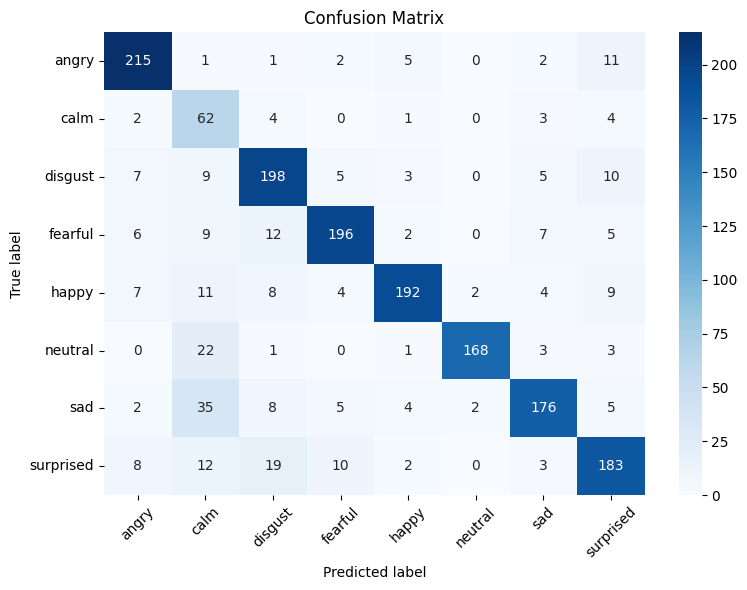

Classification Report:

              precision    recall  f1-score   support

       angry       0.87      0.91      0.89       237
        calm       0.39      0.82      0.52        76
     disgust       0.79      0.84      0.81       237
     fearful       0.88      0.83      0.85       237
       happy       0.91      0.81      0.86       237
     neutral       0.98      0.85      0.91       198
         sad       0.87      0.74      0.80       237
   surprised       0.80      0.77      0.78       237

    accuracy                           0.82      1696
   macro avg       0.81      0.82      0.80      1696
weighted avg       0.85      0.82      0.83      1696



In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Predict classes on the validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val,       axis=1)

# 2) If you still have your original OneHotEncoder, grab the class names:
#    (if you overwrote it, you can reconstruct this list manually in the same order)
class_names = enc.categories_[0]

# 3) Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4) Plot it
plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 5) Print a full classification report
print("Classification Report:\n")
print(classification_report(y_true,
                            y_pred,
                            target_names=class_names))


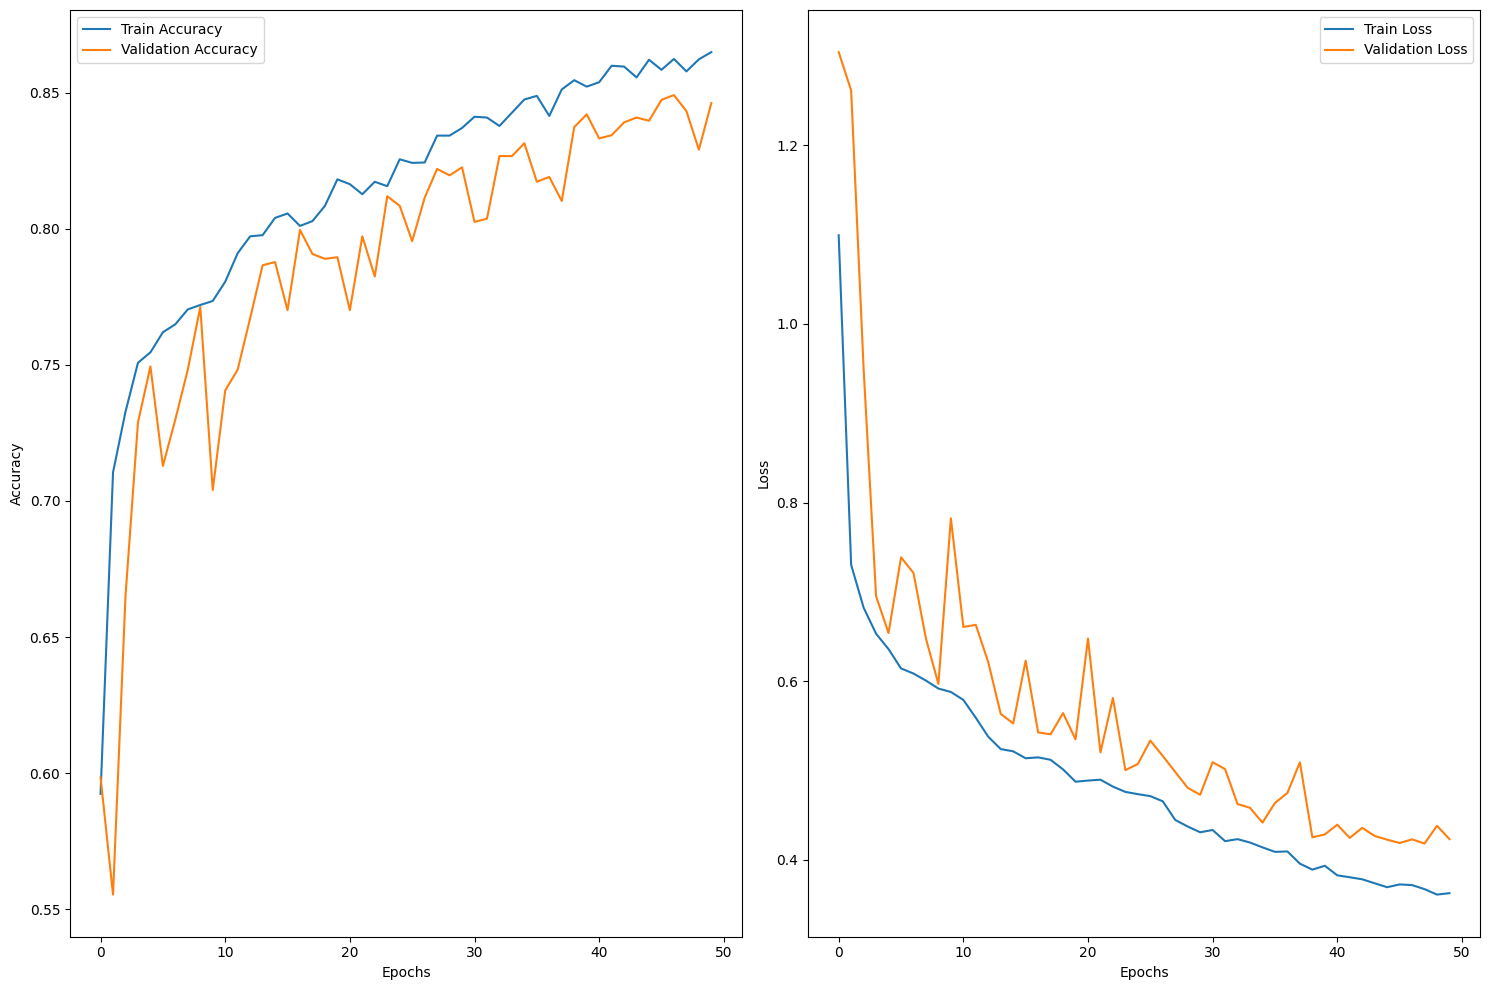

Best Training Accuracy: 86.48%
Best Validation Accuracy: 84.91%


In [6]:
# -----------------------------
# 6. Plot Training History
# -----------------------------
epochs_range = range(len(history.history['accuracy']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Display best metrics
best_train_acc = max(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])
print(f"Best Training Accuracy: {best_train_acc * 100:.2f}%")
print(f"Best Validation Accuracy: {best_val_acc * 100:.2f}%")

**Testing on Real Interview**

In [10]:
!pip install pygame --upgrade


^C


In [12]:
from moviepy.editor import VideoFileClip
import ipywidgets as widgets
from IPython.display import display, clear_output

In [19]:
def save_uploaded_video(uploader):
    if uploader.value:
        # uploader.value might be a dict or list; try converting to a list of file info objects.
        try:
            # if uploader.value behaves like a dictionary:
            files = list(uploader.value.values())
        except AttributeError:
            # Otherwise, assume uploader.value is already iterable
            files = uploader.value

        for file_info in files:
            # file_info might be a dict or an object with attributes 'name' and 'content'
            if isinstance(file_info, dict):
                fname = file_info.get('name', None)
                content = file_info.get('content', None)
            else:
                fname = getattr(file_info, "name", None)
                content = getattr(file_info, "content", None)
                
            if fname is not None and content is not None:
                with open(fname, "wb") as f:
                    f.write(content)
                print(f"Uploaded video saved as: {fname}")
                return fname
    else:
        print("No file uploaded!")
    return None


In [20]:
# You can run this cell after uploading the file.
video_filename = save_uploaded_video(upload_widget)

Uploaded video saved as: gp test.mp4


In [21]:
import numpy as np
import librosa

def segment_audio(signal, sr, segment_length_sec=6):
    """
    Splits a long audio signal into segments of fixed length.
    
    Parameters:
      signal: The full audio array.
      sr: Sample rate.
      segment_length_sec: Duration of each segment in seconds.
      
    Returns:
      A list of audio segments (numpy arrays).
    """
    samples_per_segment = sr * segment_length_sec
    total_samples = len(signal)
    segments = []
    
    # Iterate over audio with fixed steps (non-overlapping segments)
    for start in range(0, total_samples, samples_per_segment):
        end = start + samples_per_segment
        seg = signal[start:end]
        # If the segment is shorter than the segment length, pad it
        if len(seg) < samples_per_segment:
            pad_width = samples_per_segment - len(seg)
            seg = np.pad(seg, (0, pad_width), mode='constant')
        segments.append(seg)
    return segments


In [22]:
def extract_mfcc_from_signal(signal, sr, n_mfcc=40, max_len=100):
    """
    Extract MFCC features from an audio signal.
    
    Parameters:
      signal: The audio signal array.
      sr: Sample rate.
      n_mfcc: Number of MFCCs.
      max_len: Number of frames to pad/truncate to.
      
    Returns:
      Transposed MFCC feature matrix with shape (time_steps, n_mfcc).
    """
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)
    return mfcc.T  # Shape: (max_len, n_mfcc)


In [24]:
import librosa

# Load the full audio from the previously extracted file
audio_file = "gp test.mp4"
signal, sr = librosa.load(audio_file, sr=None)
print("Full audio length (seconds):", len(signal) / sr)

# Segment the long audio into 6-second chunks
segments = segment_audio(signal, sr, segment_length_sec=6)
print(f"Total segments created: {len(segments)}")


Full audio length (seconds): 45.16281179138322
Total segments created: 8


In [25]:
n_mfcc = 40
max_len = 100  # Should match your training parameter

# Process every segment to get MFCC features in the expected shape
features = []
for seg in segments:
    mfcc_features = extract_mfcc_from_signal(seg, sr, n_mfcc=n_mfcc, max_len=max_len)
    features.append(mfcc_features)

# Convert the list to a numpy array with shape (num_segments, max_len, n_mfcc)
X_test = np.array(features)
print("Shape of X_test:", X_test.shape)


Shape of X_test: (8, 100, 40)


In [28]:
# Predict on all segments (X_test shape is: (num_segments, max_len, n_mfcc))
predictions = model.predict(X_test)  # shape: (num_segments, num_classes)
print("Predictions for each segment:\n", predictions)

# Option 1: Average softmax probabilities across all segments
avg_predictions = np.mean(predictions, axis=0)
overall_index = np.argmax(avg_predictions)
print("Averaged prediction scores:", avg_predictions)



# Option 2: Alternatively, you could also perform a majority vote on each segment's prediction:
segment_labels = np.argmax(predictions, axis=1)
from scipy.stats import mode
majority_vote_result = mode(segment_labels)
# Check if the mode is an array or scalar:
if np.isscalar(majority_vote_result.mode):
    majority_vote_index = majority_vote_result.mode
else:
    majority_vote_index = majority_vote_result.mode[0]

if 'enc' in globals():
    majority_emotion = enc.categories_[0][majority_vote_index]
    print("Overall predicted emotion (majority vote):", majority_emotion)
else:
    print("OneHotEncoder 'enc' not found.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predictions for each segment:
 [[1.5367848e-04 7.1123195e-06 6.2778154e-03 9.0330437e-02 7.3460219e-06
  9.0196925e-01 5.5135088e-06 1.8669575e-09 1.2479480e-03 9.4472654e-07]
 [9.9235725e-01 1.5200715e-08 6.0052699e-03 3.0785954e-10 7.5490949e-05
  1.5354772e-03 2.5345622e-05 4.5559576e-17 1.1549888e-06 8.3115822e-08]
 [8.6782011e-06 1.2839924e-02 9.5947653e-01 1.5022369e-05 4.8905764e-07
  1.3102881e-03 5.8282109e-05 1.7173604e-10 2.6285626e-02 5.1669981e-06]
 [9.7110955e-05 1.9694701e-01 1.0883481e-01 2.9177971e-05 9.2763257e-06
  9.2887820e-04 9.7171001e-02 4.6044906e-13 5.9598267e-01 6.5324947e-08]
 [1.8503830e-06 8.9386531e-06 2.3189602e-04 2.9036579e-08 4.3406732e-07
  1.2673095e-05 2.4319455e-05 6.3852749e-15 9.9971986e-01 1.2360623e-09]
 [1.5977473e-03 1.3326739e-04 9.5481455e-01 9.7381644e-07 2.9314028e-06
  4.0885184e-02 5.6900480e-04 2.5362697e-15 1.9963712e-03 5.6945444e-09]
 [2.5023692e-05 3.3228058e-02 1.8147333e-01 2.7868461e-09 2.1

In [30]:
import ipywidgets as widgets
from IPython.display import display

# Create an audio file uploader widget that accepts WAV and MP3 files.
audio_upload_widget = widgets.FileUpload(
    accept=".wav, .mp3",  # Accept only WAV and MP3 files
    multiple=False        # Only one file at a time
)
display(audio_upload_widget)

# Function to save the uploaded audio file to disk
def save_uploaded_audio(uploader):
    if uploader.value:
        try:
            # uploader.value might be a dictionary or a list; convert to a list of file info objects.
            files = list(uploader.value.values())
        except AttributeError:
            files = uploader.value
            
        for file_info in files:
            # Handle both dict and object types (if using Bunch objects in Kaggle)
            if isinstance(file_info, dict):
                fname = file_info.get('name', None)
                content = file_info.get('content', None)
            else:
                fname = getattr(file_info, "name", None)
                content = getattr(file_info, "content", None)
                
            if fname is not None and content is not None:
                with open(fname, "wb") as f:
                    f.write(content)
                print(f"Uploaded audio saved as: {fname}")
                return fname
    else:
        print("No audio file uploaded!")
    return None


FileUpload(value=(), accept='.wav, .mp3', description='Upload')

In [31]:
# Save the uploaded audio file and get its filename
audio_filename = save_uploaded_audio(audio_upload_widget)

Uploaded audio saved as: WhatsApp-Audio-2025-04-08-at-18.49.41_cd1cfcf9.waptt.mp3


In [32]:
import numpy as np
import librosa

def segment_audio(signal, sr, segment_length_sec=6):
    """
    Splits a long audio signal into segments of fixed length.
    
    Parameters:
      signal: The full audio array.
      sr: Sample rate.
      segment_length_sec: Duration of each segment in seconds.
      
    Returns:
      A list of audio segments (numpy arrays).
    """
    samples_per_segment = sr * segment_length_sec
    total_samples = len(signal)
    segments = []
    
    # Iterate over audio with fixed steps (non-overlapping segments)
    for start in range(0, total_samples, samples_per_segment):
        end = start + samples_per_segment
        seg = signal[start:end]
        # If the segment is shorter than the segment length, pad it
        if len(seg) < samples_per_segment:
            pad_width = samples_per_segment - len(seg)
            seg = np.pad(seg, (0, pad_width), mode='constant')
        segments.append(seg)
    return segments


def extract_mfcc_from_signal(signal, sr, n_mfcc=40, max_len=100):
    """
    Extract MFCC features from an audio signal.
    
    Parameters:
      signal: The audio signal array.
      sr: Sample rate.
      n_mfcc: Number of MFCCs.
      max_len: Number of frames to pad/truncate to.
      
    Returns:
      Transposed MFCC feature matrix with shape (time_steps, n_mfcc).
    """
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)
    return mfcc.T  # Shape: (max_len, n_mfcc)
import librosa

# Load the full audio from the previously extracted file
audio_file = "WhatsApp-Audio-2025-04-08-at-18.49.41_cd1cfcf9.waptt.mp3"
signal, sr = librosa.load(audio_file, sr=None)
print("Full audio length (seconds):", len(signal) / sr)

# Segment the long audio into 6-second chunks
segments = segment_audio(signal, sr, segment_length_sec=6)
print(f"Total segments created: {len(segments)}")
n_mfcc = 40
max_len = 100  # Should match your training parameter

# Process every segment to get MFCC features in the expected shape
features = []
for seg in segments:
    mfcc_features = extract_mfcc_from_signal(seg, sr, n_mfcc=n_mfcc, max_len=max_len)
    features.append(mfcc_features)

# Convert the list to a numpy array with shape (num_segments, max_len, n_mfcc)
X_test = np.array(features)
print("Shape of X_test:", X_test.shape)



Full audio length (seconds): 3.817833333333333
Total segments created: 1
Shape of X_test: (1, 100, 40)


In [33]:
# Predict on all segments (X_test shape is: (num_segments, max_len, n_mfcc))
predictions = model.predict(X_test)  # shape: (num_segments, num_classes)
print("Predictions for each segment:\n", predictions)

# Option 1: Average softmax probabilities across all segments
avg_predictions = np.mean(predictions, axis=0)
overall_index = np.argmax(avg_predictions)
print("Averaged prediction scores:", avg_predictions)



# Option 2: Alternatively, you could also perform a majority vote on each segment's prediction:
segment_labels = np.argmax(predictions, axis=1)
from scipy.stats import mode
majority_vote_result = mode(segment_labels)
# Check if the mode is an array or scalar:
if np.isscalar(majority_vote_result.mode):
    majority_vote_index = majority_vote_result.mode
else:
    majority_vote_index = majority_vote_result.mode[0]

if 'enc' in globals():
    majority_emotion = enc.categories_[0][majority_vote_index]
    print("Overall predicted emotion (majority vote):", majority_emotion)
else:
    print("OneHotEncoder 'enc' not found.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predictions for each segment:
 [[7.1512698e-04 2.3418188e-01 1.2380660e-04 3.1962757e-06 1.1250943e-05
  2.0028888e-04 6.8201429e-01 3.5199070e-09 6.4835481e-02 1.7914712e-02]]
Averaged prediction scores: [7.1512698e-04 2.3418188e-01 1.2380660e-04 3.1962757e-06 1.1250943e-05
 2.0028888e-04 6.8201429e-01 3.5199070e-09 6.4835481e-02 1.7914712e-02]
Overall predicted emotion (majority vote): neutral
